Exercise for b

Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

INSTRUCTIONS


Import numpy and pandas as their standard aliases.
Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
Create array X for the 'fertility' feature and array y for the 'life' target variable.
Reshape the arrays by using the .reshape() method and passing in (-1, 1).

#### Import numpy and pandas
#### Read the CSV file into a DataFrame: df
#### Create arrays for features and target variable
#### Print the dimensions of X and y before reshaping
#### Reshape X and y
#### Print the dimensions of X and y after reshaping

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('gapminder.csv')
df.head()

,index,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [3]:
df.keys()

Index(['index', 'population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            139 non-null    int64  
 1   population       139 non-null    float64
 2   fertility        139 non-null    float64
 3   HIV              139 non-null    float64
 4   CO2              139 non-null    float64
 5   BMI_male         139 non-null    float64
 6   GDP              139 non-null    float64
 7   BMI_female       139 non-null    float64
 8   life             139 non-null    float64
 9   child_mortality  139 non-null    float64
 10  Region           139 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 12.1+ KB


In [5]:
df.isnull().sum() #to see any missing entries

index              0
population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

Exploring the data set:

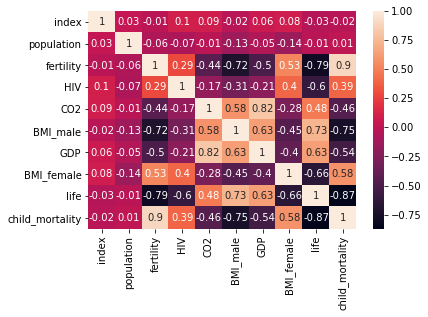

In [6]:
import seaborn as sns
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
y = df['life'].values
X = df['fertility'].values

In [8]:
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [9]:
y = y.reshape(-1,1)

In [10]:
print("Dimensions of y after reshaping: {}".format(y.shape))

Dimensions of y after reshaping: (139, 1)


Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

INSTRUCTIONS


Import LinearRegression from sklearn.linear_model.
Create a LinearRegression regressor called reg.
Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
Compute and print the R2

 score using the .score() method.
Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!


In [14]:
X_fertility = df['fertility'].values

In [18]:
X_fertility = X_fertility.reshape(-1,1)

0.6192442167740035


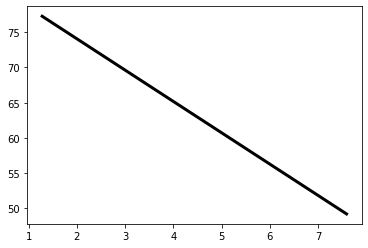

In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

Train/test split for regression

As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

INSTRUCTIONS

Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
Compute and print the R2 score using the .score() method on the test set.

Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().


In [22]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239
